In [3]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt 

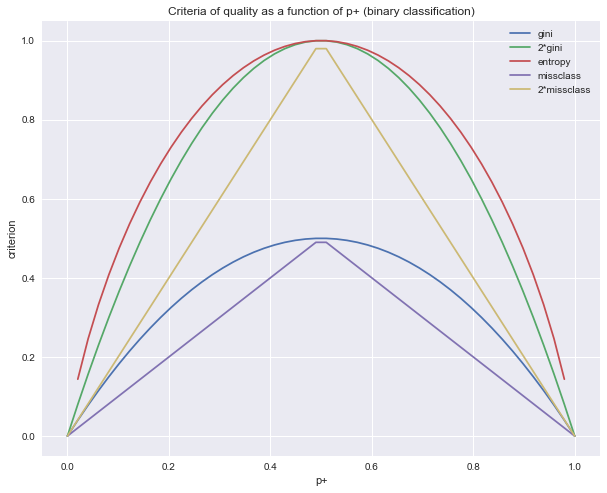

In [15]:
plt.figure(figsize=(10,8))
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label = 'gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label = '2*gini')
plt.plot(xx, [-x * np.log2(x)-(1-x) * np.log2(1-x) for x in xx], label = 'entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label = 'missclass')
plt.plot(xx, [2-2 * max(x, 1-x) for x in xx], label = '2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Criteria of quality as a function of p+ (binary classification)')
plt.legend()

In [15]:
#first class 
np.random.seed(17)
train_data = np.random.normal(size = (100,2))
train_labels = np.zeros(100)

# adding second class 
train_data = np.r_[train_data, np.random.normal(size=(100,2), loc = 2)]
train_labels = np.r_[train_labels, np.ones(100)]

In [26]:
train_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
train_data

array([[ 2.76265890e-01, -1.85462808e+00],
       [ 6.23901111e-01,  1.14531129e+00],
       [ 1.03719047e+00,  1.88663893e+00],
       [-1.11698290e-01, -3.62101338e-01],
       [ 1.48675045e-01, -4.37783153e-01],
       [ 2.17125700e+00,  1.15231025e+00],
       [-1.81881234e+00, -1.38049341e-01],
       [ 5.39839614e-01, -1.77528229e+00],
       [ 1.31487654e+00, -4.73448047e-01],
       [-1.09222990e+00, -2.50027442e-01],
       [-9.82294304e-01,  1.03126909e+00],
       [ 4.91333776e-01, -4.46646604e-01],
       [-8.06360082e-01,  1.31267758e-01],
       [-1.21256024e+00,  1.59990853e-01],
       [-7.55223036e-01,  3.49895992e-01],
       [ 9.77541764e-01, -1.38585250e-01],
       [ 1.03856305e-01,  3.00591036e-01],
       [ 9.68205296e-01,  8.69623842e-01],
       [ 5.67783089e-01,  4.65282344e-01],
       [-1.16537308e+00, -2.03599479e+00],
       [-1.15541329e+00,  3.34515739e+00],
       [ 1.26727211e-01, -6.94178896e-01],
       [ 5.57674431e-01,  9.91466000e-02],
       [ 6.

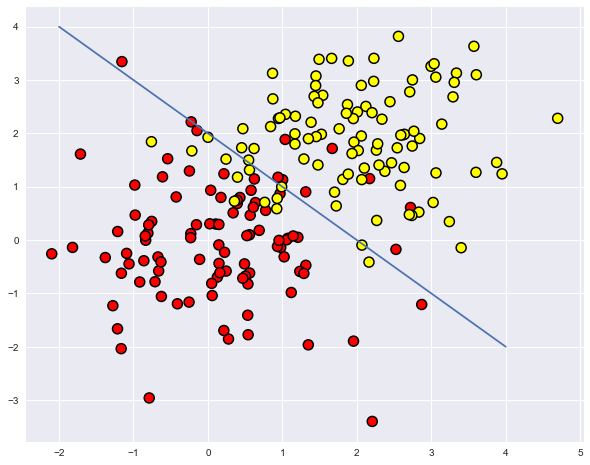

In [16]:
plt.figure(figsize = (10,8))
plt.scatter(train_data[:,0], train_data[:, 1], c=train_labels, s=100,
           cmap = 'autumn', edgecolors='black', linewidth = 1.5);
plt.plot(range(-2,5), range(4,-3,-1));

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
def get_grid(data):
    x_min, x_max = data[:, 0].min()-1, data [:, 1].max()+1
    y_min, y_max = data[:, 1].min()-1, data [:, 1].max()+1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

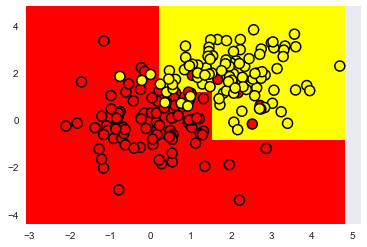

In [17]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)
   
#training the tree
clf_tree.fit(train_data, train_labels)

#some code for separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                  yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap = 'autumn')
plt.scatter(train_data[:,0], train_data[:, 1], c = train_labels, s = 100,
            cmap = 'autumn', edgecolors = 'black', linewidth = 1.5);

In [18]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

ModuleNotFoundError: No module named 'pydotplus'

In [6]:
conda install -c conda-forge pydotplus 
conda install -c conda-forge/label/gcc7 pydotplus 
conda install -c conda-forge/label/cf201901 pydotplus

SyntaxError: invalid syntax (<ipython-input-6-468b270f05ea>, line 1)

In [21]:
conda install anaconda pydotplus

SyntaxError: invalid syntax (<ipython-input-21-aabedb0799e2>, line 1)

In [7]:
data = pd.DataFrame({'Age': [17,64,18,20,38,49,55,25,29,31,33], 
             'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


In [8]:
data.sort_values('Age')


,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [9]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Age'].values.reshape(-1, 1), data['Loan Default'].values)

tree_graph_to_png(age_tree, feature_names=['Age'], 
                 png_file_to_save='../../img/topic_tree2.png')

NameError: name 'DecisionTreeClassifier' is not defined

In [22]:
data2 = pd.DataFrame({'Age':  [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33], 
                      'Salary': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88], 
             'Loan Default': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]})


In [23]:
data2

,Age,Salary,Loan Default
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


In [24]:
data2.sort_values('Age')

,Age,Salary,Loan Default
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [25]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[['Age', 'Salary']].values, data2['Loan Default'].values);

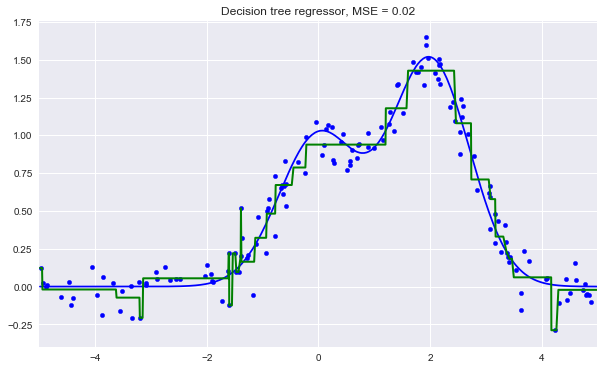

In [27]:
n_train = 150
n_test= 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % (np.sum((y_test - reg_tree_pred) ** 2) / n_test))
plt.show()

In [ ]:
df = pd.read_csv('../../data/telecom_churn.csv')

df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)